<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h1>Görülmemiş Verilere Karşı Model Dayanıklılığını Kontrol Etme Yöntemleri</h1>
Modelimizin <strong>unseen data</strong> (<strong>görülmemiş veriler</strong>) karşısında ne kadar sağlam olduğunu değerlendirmek için <strong>validation</strong> (<strong>doğrulama</strong>) yöntemini kullanabiliriz. Bu yöntem, bir veri setinin belirli bir örneğini modelin eğitiminde kullanmamak anlamına gelir. Sonrasında, modelimizi bu örnek üzerinde test ederiz ve modeli sonlandırmadan önce bu testin sonuçlarını değerlendiririz. Yaygın kullanılan bazı <strong>validation methods</strong> (<strong>doğrulama yöntemleri</strong>) aşağıda sıralanmıştır:
    <ul>
  <li>Validation set approach (Doğrulama seti yaklaşımı)</li>
  <li>k-Fold cross validation (k-katlı çapraz doğrulama)</li>
  <li>Leave-One-Out Cross Validation (LOOCV) (Bir bırak çapraz doğrulama)</li>
  <li>Stratified k-Fold cross validation (Katmanlı k-katlı çapraz doğrulama)</li>
</ul>
</font>



## Kütüphaneleri İçe Aktarma:

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Grafiklerin doğrudan not defterinde gösterilmesini sağlar
%matplotlib inline

# Uyarıları yok say
import warnings
warnings.filterwarnings("ignore")


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Veri Setlerinin Yüklenmesi
</h2>
Aşağıdaki kod, iki farklı CSV dosyasını okuyarak eğitim ve test veri setlerini yükler:
</font>

In [9]:
train = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Home-Loan-Eligibility-Predictor\dataset\train_ctrUa4K.csv")
test = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Home-Loan-Eligibility-Predictor\dataset\test_lAUu6dG.csv")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Eğitim Veri Setindeki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, eğitim veri setindeki eksik (NaN) değerleri, her sütunun mod (en sık görülen değer) ile doldurur:
</font>

In [10]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace = True)
train["Married"].fillna(train["Married"].mode()[0], inplace = True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace = True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Test Veri Setindeki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, test veri setindeki eksik (NaN) değerleri, her sütunun mod (en sık görülen değer) ile doldurur:
</font>

In [11]:
test["Gender"].fillna(test["Gender"].mode()[0], inplace = True)
test["Married"].fillna(test["Married"].mode()[0], inplace = True)
test["Dependents"].fillna(test["Dependents"].mode()[0], inplace = True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0], inplace = True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Loan_Amount_Term Sütunundaki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, hem eğitim (<strong>train</strong>) hem de test (<strong>test</strong>) veri setlerinde, <strong>Loan_Amount_Term</strong> sütunundaki eksik (<strong>NaN</strong>) değerleri en sık görülen değer (<strong>mod</strong>) ile doldurur:
</font>

In [12]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace = True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
LoanAmount Sütunundaki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, hem eğitim (<strong>train</strong>) hem de test (<strong>test</strong>) veri setlerinde, <strong>LoanAmount</strong> sütunundaki eksik (<strong>NaN</strong>) değerleri sütunun <strong>medyan</strong> değeriyle doldurur:
</font>

In [13]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True)
test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Kategorik Verilerin Sayısal Veriye Dönüştürülmesi (One-Hot Encoding)
</h2>
Aşağıdaki kod parçaları, eğitim (<strong>train</strong>) ve test (<strong>test</strong>) veri setlerinde kategorik sütunlar için <strong>one-hot encoding</strong> işlemi gerçekleştirir:
</font>

In [15]:
test_id = test["Loan_ID"]

# "Loan_ID" kolonunu kaldır
train = train.drop("Loan_ID", axis=1)
test = test.drop("Loan_ID", axis=1)

# Özellikler (X) ve hedef değişken (y) ayırma
X = train.drop("Loan_Status", axis=1)
y = train["Loan_Status"]

# Eğitim setindeki kategorik sütunları belirleyin ve One-Hot Encoding uygulayın
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Test setindeki kategorik sütunları belirleyin ve One-Hot Encoding uygulayın
test_categorical_cols = test.select_dtypes(include=['object']).columns
test = pd.get_dummies(test, columns=test_categorical_cols, drop_first=True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <h2>Stratifiye K-Katlamalı Çapraz Doğrulama</h2>    
    <ul>
        <li><b>Stratifikasyon Nedir?</b><br>
            Stratifikasyon, verilerin her katlamada, tüm veri setinin iyi bir temsilcisi olacak şekilde düzenlenmesidir. Bu, modelin her katlamada verilerin dağılımını doğru şekilde öğrenmesini sağlar.
        </li>
        <li><b>İkili Sınıflandırma Örneği</b><br>
            Örneğin, bir ikili sınıflandırma probleminde, verilerin %50'si bir sınıfa, %50'si diğer sınıfa ait olabilir. Bu durumda, her katlamada her sınıfın yaklaşık %50'sini içeren bir düzenleme yapmak en iyisidir. Böylece, her katlama veri setinin tüm özelliklerini daha doğru bir şekilde yansıtır.
        </li>
        <li><b>Bias ve Varyans Yönetimi</b><br>
            Stratifikasyon, bias ve varyans sorunlarını daha iyi yönetmek için genellikle daha etkili bir yaklaşımdır. Bu, modelin her katlamada dengeli ve doğru veri ile eğitim almasını sağlar.
        </li>
        <li><b>Sınıf Dengesizliği Durumları</b><br>
            Özellikle büyük sınıf dengesizliği durumlarında, rastgele seçilen bir katlama küçük sınıfı yeterince temsil etmeyebilir. Stratifikasyon, her sınıfın verinin tüm katlamalarda uygun şekilde temsil edilmesini sağlayarak bu sorunu ortadan kaldırır.
        </li>
    </ul>
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Aşağıda, <strong>k = 5</strong> olduğunda stratifiye k-katlamalı doğrulamanın görselleştirmesi yer almaktadır:
</font>

<img src="imajes/İmaje-1.png" style="width: 100%; height: auto; object-fit: cover; display: block;">

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <strong>StratifiedKFold</strong>'ü <strong>sklearn</strong>'den içe aktaralım ve modeli eğitelim:
</font>

In [16]:
from sklearn.model_selection import StratifiedKFold

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Şimdi, <strong>stratifiye 5 katlamalı çapraz doğrulama</strong> ile bir <strong>lojistik regresyon</strong> modeli kuralım ve <strong>test veri seti</strong> için tahminler yapalım:
</font>

In [17]:
# K-Fold Cross Validation
i = 1

# StratifiedKFold tanımı
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print("\n{} of kfold {}".format(i,kf.n_splits))

    # Eğitim ve test veri setlerini ayır
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    # Modeli eğit
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)

    # Doğrulama setinde tahmin yap
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print(f"Accuracy Score for Fold {i}: {score}")

    i += 1

# Test setinde tahmin yap
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score for Fold 1: 0.8211382113821138

2 of kfold 5
Accuracy Score for Fold 2: 0.8373983739837398

3 of kfold 5
Accuracy Score for Fold 3: 0.7967479674796748

4 of kfold 5
Accuracy Score for Fold 4: 0.8211382113821138

5 of kfold 5
Accuracy Score for Fold 5: 0.7868852459016393


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Bu modelin ortalama doğrulama doğruluğu <strong>0.81</strong> olarak bulunuyor. Şimdi, <strong>ROC eğrisini</strong> görselleştirelim:
</font>

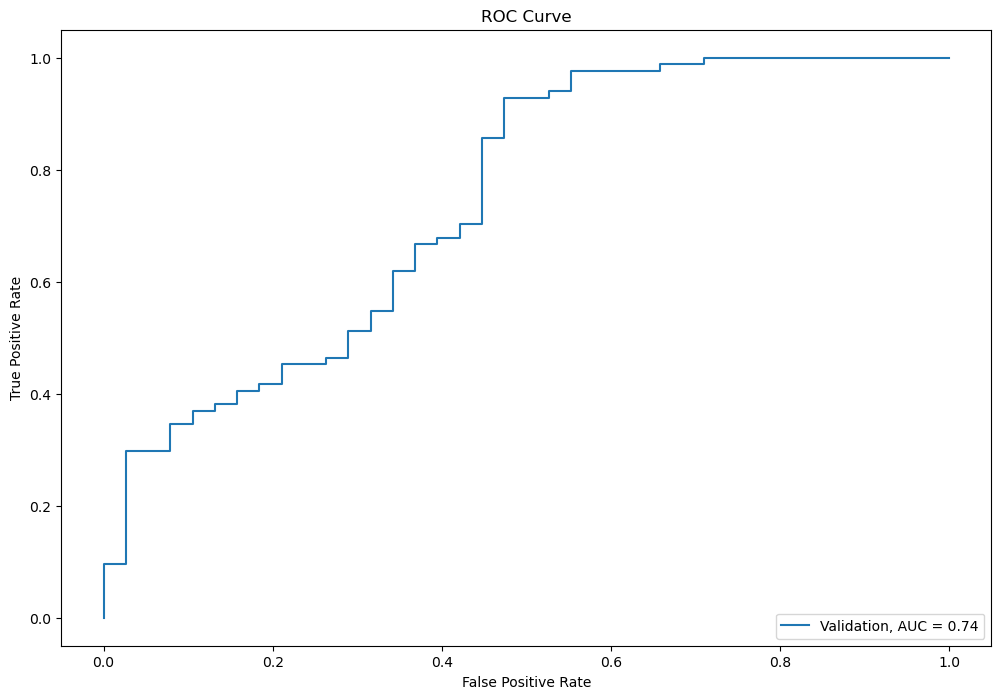

In [18]:
from sklearn import metrics

# Etiketleri 0 ve 1'e dönüştürüyoruz
yvl_numeric = yvl.map({'N': 0, 'Y': 1})  # 'N' -> 0, 'Y' -> 1

# ROC hesaplamalarını yeniden yapıyoruz
fpr, tpr, thresholds = metrics.roc_curve(yvl_numeric, pred)
auc = metrics.roc_auc_score(yvl_numeric, pred)

# ROC eğrisi çizimi
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label=f"Validation, AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <strong>0.74</strong>'lik bir <strong>AUC</strong> değeri elde ettik.
</font>

In [19]:
# Test setindeki Loan_ID'yi ve tahmin edilen Loan_Status'u birleştiriyoruz
submission = pd.DataFrame()  # Boş bir DataFrame oluşturuyoruz
submission['Loan_ID'] = test_id  # Loan_ID sütununu ekliyoruz
submission['Loan_Status'] = pred_test  # Loan_Status sütununu ekliyoruz

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Unutmayalım, tahminlerin <strong>Y</strong> ve <strong>N formatında</strong> olması gerekiyor. Bu nedenle, <strong>1</strong> ve <strong>0</strong> değerlerini <strong>Y</strong> ve <strong>N</strong> olarak dönüştürelim.
</font>

In [20]:
submission["Loan_Status"].replace(0, "N", inplace=True)
submission["Loan_Status"].replace(1, "Y", inplace=True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Şimdi, gönderimi <strong>.csv formatına</strong> dönüştürelim ve <strong>doğrulama skorunu</strong> liderlik tablosunda görmek için göndermeyi yapalım:
</font>

In [21]:
pd.DataFrame(submission, columns = ["Load_ID", "Loan_Status"]).to_csv("K-Folds.csv")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Bu gönderimden liderlik tablosunda <strong>0.78472</strong> doğruluk elde ettik. Şimdi, farklı yaklaşımlar kullanarak bu doğruluğu artırmaya çalışacağız.
</font>